##### Linear Regression
##### Building a Linear Regression Model

##### Lab Objective :
Develop a Linear Regression model to predict 5G network bandwidth allocation using Quality of Service data. Evaluate model performance and identify key factors influencing bandwidth distribution.

### Background :
5G networks require efficient resource management to deliver high performance. This lab uses machine learning to analyze Quality of Service data, predicting bandwidth allocation needs. By understanding key factors affecting bandwidth requirements, we aim to improve network efficiency and user experience in next-generation mobile networks.

### 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### 2. Load and Explore Dataset
#### 2.1 Load the dataset

In [ ]:
df = pd.read_csv('Quality of Service 5G.csv')
print(df.head())

        Timestamp User_ID   Application_Type Signal_Strength Latency  \
0  9/3/2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
1  9/3/2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
2  9/3/2023 10:00  User_3          Streaming         -85 dBm   40 ms   
3  9/3/2023 10:00  User_4  Emergency_Service         -70 dBm   10 ms   
4  9/3/2023 10:00  User_5      Online_Gaming         -78 dBm   25 ms   

  Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
0            10 Mbps             15 Mbps                 70%  
1           100 Kbps            120 Kbps                 80%  
2             5 Mbps              6 Mbps                 75%  
3             1 Mbps            1.5 Mbps                 90%  
4             2 Mbps              3 Mbps                 85%  


#### 2.2 Get dataset info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB
None


#### 2.3 Check for missing values

In [ ]:
df.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

#### 2.4 Display statistical summary

In [ ]:
print(df.describe())

             Timestamp User_ID Application_Type Signal_Strength Latency  \
count              400     400              400             400     400   
unique               7     400               11              84      87   
top     9/3/2023 10:01  User_1       Video_Call         -97 dBm    5 ms   
freq                60       1               58               9      35   

       Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
count                 400                 400                 400  
unique                188                 194                   9  
top              0.1 Mbps            0.1 Mbps                 70%  
freq                   16                  16                 148  


### 3. Data Preprocessing
#### 3.1 Convert Timestamp to datetime and extract hour

In [ ]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract hour from Timestamp
df['Hour'] = df['Timestamp'].dt.hour

#### 3.2 Encode categorical variables

In [ ]:
# Encode categorical variables
le = LabelEncoder()
df['User_ID'] = le.fit_transform(df['User_ID'])
df['Application_Type'] = le.fit_transform(df['Application_Type'])

#### 3.3 Convert Signal_Strength to numeric

In [ ]:
# Convert Signal_Strength to numeric (remove ' dBm')
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(int)

#### 3.4 Convert Latency to numeric

In [ ]:
# Convert Latency to numeric (remove ' ms')
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(int)

#### 3.5 Convert bandwidth columns to numeric (in Mbps)

In [ ]:
# Convert bandwidth columns to numeric (remove ' Mbps' or ' Kbps' and convert to Mbps)
def convert_to_mbps(value):
    if 'Kbps' in value:
        return float(value.replace(' Kbps', '')) / 1000
    else:
        return float(value.replace(' Mbps', ''))

df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(convert_to_mbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(convert_to_mbps)

#### 3.6 Convert Resource_Allocation to numeric

In [ ]:
# Convert Resource_Allocation to numeric (remove '%')
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%', '').astype(int)

print(df.head())

            Timestamp  User_ID  Application_Type  Signal_Strength  Latency  \
0 2023-09-03 10:00:00        0                 6              -75       30   
1 2023-09-03 10:00:00      111                 9              -80       20   
2 2023-09-03 10:00:00      222                 5              -85       40   
3 2023-09-03 10:00:00      333                 1              -70       10   
4 2023-09-03 10:00:00      345                 4              -78       25   

   Required_Bandwidth  Allocated_Bandwidth  Resource_Allocation  Hour  
0                10.0                15.00                   70    10  
1                 0.1                 0.12                   80    10  
2                 5.0                 6.00                   75    10  
3                 1.0                 1.50                   90    10  
4                 2.0                 3.00                   85    10  


### 4. Feature Selection

In [ ]:
features = ['Hour', 'User_ID', 'Application_Type', 'Signal_Strength', 'Latency', 'Required_Bandwidth', 'Resource_Allocation']
target = 'Allocated_Bandwidth'

X = df[features]
y = df[target]

### 5. Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7. Model Training

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### 8. Model Evaluation

In [ ]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.20567774159555183
Root Mean Squared Error: 0.453517079717569
R-squared Score: 0.9897438279940306


### 9. Feature Importance

In [ ]:
feature_importance = pd.DataFrame({'feature': features, 'importance': model.coef_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

               feature  importance
5   Required_Bandwidth    4.512974
6  Resource_Allocation    0.077395
1              User_ID    0.021082
0                 Hour    0.000000
4              Latency   -0.056987
2     Application_Type   -0.057238
3      Signal_Strength   -0.145391


### 10. Visualizations
#### 10.1 Actual vs Predicted Values

Text(0.5, 1.0, 'Actual vs Predicted Allocated Bandwidth')

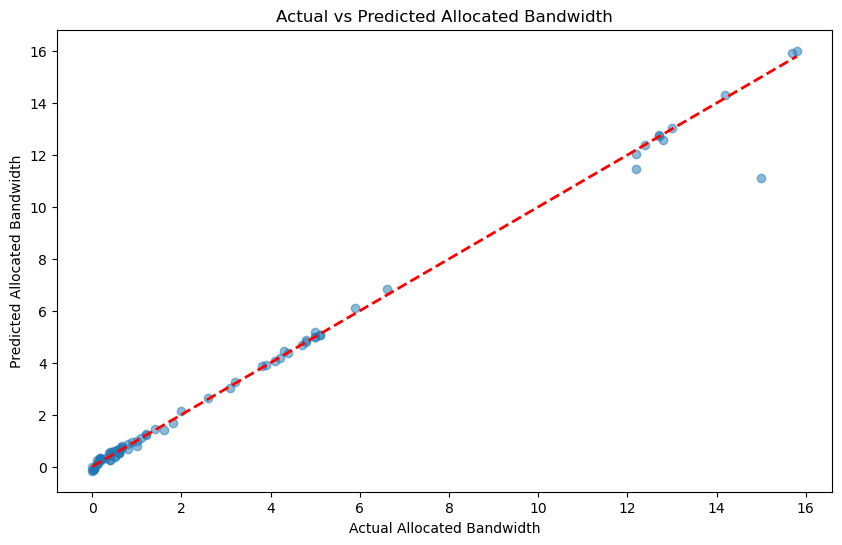

In [ ]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Allocated Bandwidth")
plt.ylabel("Predicted Allocated Bandwidth")
plt.title("Actual vs Predicted Allocated Bandwidth")
#plt.tight_layout()
#plt.show()

The scatter plot visualizes how well the model's predictions align with the actual allocated bandwidth. The red dashed line represents a perfect prediction line, and points close to this line indicate accurate predictions. This visualization helps identify discrepancies between predicted and actual values.

#### 10.2 Feature Importance

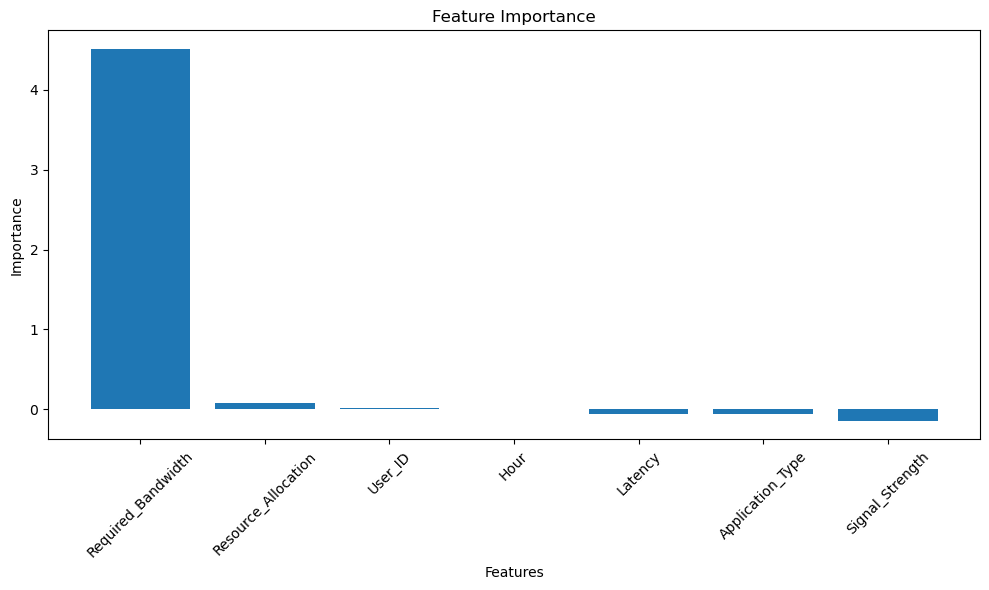

In [ ]:
# Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart displays the relative importance of each feature in predicting the allocated bandwidth. It helps identify which factors have the most influence, aiding in model interpretation and further feature engineering.

### 11. Model Interpretation

1. The Linear Regression model predicts the Allocated Bandwidth based on the input features.
2. The R-squared score indicates how well the model fits the data.
3. Feature importance shows which features have the most impact on the predictions.
4. The RMSE gives an idea of the average prediction error in the same units as the target variable (Mbps).


### 12. Conclusion

This lab demonstrated how to build a Linear Regression model to predict network data consumption.
The model's performance can be improved by feature engineering, trying other algorithms, or using more advanced techniques.